### Paso 1: Importar bibliotecas

In [85]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Paso 2: Cargar el conjunto de datos MNIST

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
print('Tamaño del X_train: ', x_train.shape)
print('Tamaño del y_train: ', y_train.shape)
print('Tamaño del X_test: ', x_test.shape)
print('Tamaño del y_test: ', y_test.shape)

Tamaño del X_train:  (60000, 28, 28)
Tamaño del y_train:  (60000,)
Tamaño del X_test:  (10000, 28, 28)
Tamaño del y_test:  (10000,)


In [89]:
x_train_inv = 255 - x_train 

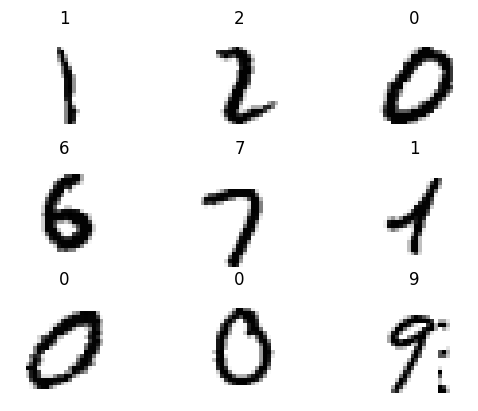

In [90]:
show_imgs = np.random.randint(0,x_train_inv.shape[0],9)
for i in range(len(show_imgs)):
    img = x_train_inv[show_imgs[i],:,:]
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(y_train[show_imgs[i]])
plt.show()

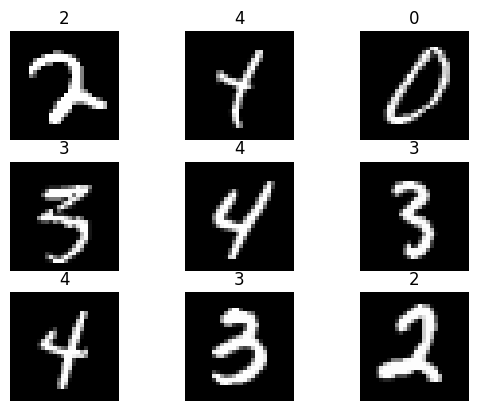

In [49]:
show_imgs = np.random.randint(0,x_train.shape[0],9)
for i in range(len(show_imgs)):
    img = x_train[show_imgs[i],:,:]
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(y_train[show_imgs[i]])
plt.show()

### Paso 3: Preprocesar los datos

In [50]:
x_train = x_train.astype('float32') / 255  # Normalización
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes
x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [51]:
print('Tamaño del X_train: ', x_train.shape)
print('Tamaño del y_train: ', y_train.shape)
print('Tamaño del X_test: ', x_test.shape)
print('Tamaño del y_test: ', y_test.shape)

Tamaño del X_train:  (60000, 784)
Tamaño del y_train:  (60000, 10)
Tamaño del X_test:  (10000, 784)
Tamaño del y_test:  (10000, 10)


In [52]:
y_trainOHE = tf.keras.utils.to_categorical([0,1,2,3,4,5,6,7,8,9])
for i , ohe in enumerate(y_trainOHE):
    print(i , '=>' ,ohe)

0 => [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 => [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 => [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3 => [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4 => [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6 => [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7 => [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8 => [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9 => [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Paso 4: Definir el modelo MLP

In [65]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

In [75]:
model = models.Sequential()

model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))  # Leaky ReLU

model.add(layers.Dense(250, activation='leaky_relu'))  

model.add(layers.Dense(16, activation='leaky_relu'))  

model.add(layers.Dense(16, activation='leaky_relu'))  

model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

### Paso 5: Compilar el modelo

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Paso 6: Entrenar el modelo

In [77]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8110 - loss: 0.5956 - val_accuracy: 0.9645 - val_loss: 0.1240
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9682 - loss: 0.1091 - val_accuracy: 0.9666 - val_loss: 0.1126
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9806 - loss: 0.0661 - val_accuracy: 0.9736 - val_loss: 0.0937
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9743 - val_loss: 0.0880
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9908 - loss: 0.0302 - val_accuracy: 0.9745 - val_loss: 0.0904
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9927 - loss: 0.0255 - val_accuracy: 0.9754 - val_loss: 0.0944
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9727 - val_loss: 0.1044
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9942 - loss: 0.0169 - val_accuracy: 0.

In [84]:
pesos = model.get_weights()
print(pesos)

[array([[-0.00898927, -0.0143749 , -0.01287423, ...,  0.05802036,
         0.01694423,  0.05176583],
       [-0.02852711,  0.03139797, -0.05911202, ..., -0.0112533 ,
        -0.03597761, -0.03443038],
       [-0.02096104, -0.04419717, -0.0605651 , ..., -0.02296037,
         0.00031476, -0.05111044],
       ...,
       [-0.0165798 , -0.00197421,  0.01216303, ..., -0.01525991,
         0.04523743, -0.04886974],
       [ 0.00428006, -0.04875556,  0.03903887, ...,  0.05758822,
         0.05240932, -0.0389844 ],
       [-0.01870166,  0.03743833, -0.0054264 , ..., -0.05970243,
        -0.00073149, -0.00488693]], dtype=float32), array([-1.56961661e-02, -3.11651956e-02,  1.38639100e-02, -1.56816076e-02,
       -2.07148809e-02, -1.16304912e-01,  2.72778720e-02, -8.09519589e-02,
       -5.88617362e-02, -3.63542959e-02, -2.64798701e-02,  5.34217656e-02,
       -1.10517293e-02, -2.98898201e-02, -3.10759265e-02, -7.48731047e-02,
       -2.95208916e-02, -4.26456518e-02,  1.23334639e-02, -4.17109989e

### Paso 7: Evaluar el modelo

In [79]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9764 - loss: 0.1194
Precisión en el conjunto de prueba: 0.9799000024795532


### Paso 8: Probar el modelo con una imagen del conjunto de prueba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


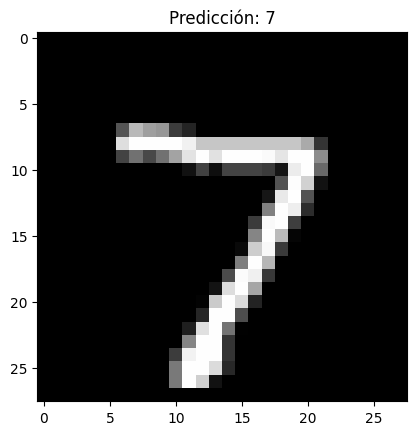

In [57]:
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen
prediccion = model.predict(imagen)
digit_predicho = np.argmax(prediccion)

# Mostrar la imagen y el dígito predicho
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {digit_predicho}')
plt.show()

### Paso 9: Probar el modelo con una imagen personalizada

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción para la imagen personalizada: 2


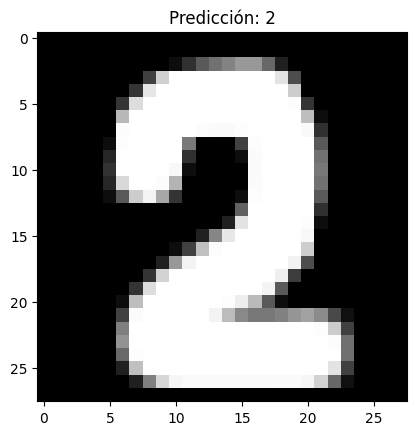

In [69]:
def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)

    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.show()

# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada('/home/santiago/Documentos/Estudio/MinTIC/Interligencia Artificial/Data/Imagenes/numero.png')

In [59]:
#Paso  10: Guardar el modelo

model.save('mlp_model.h5')  # Guardar como archivo HDF5
print("Modelo guardado")

Modelo guardado


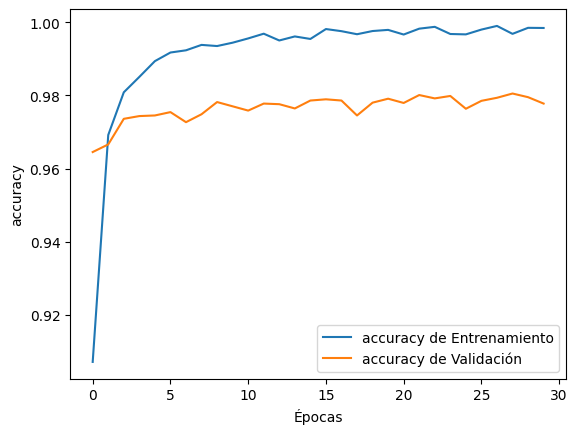

In [80]:
# Graficar la pérdida
plt.plot(history.history['accuracy'], label='accuracy de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='accuracy de Validación')
plt.xlabel('Épocas')
plt.ylabel('accuracy')
plt.legend()
plt.show()

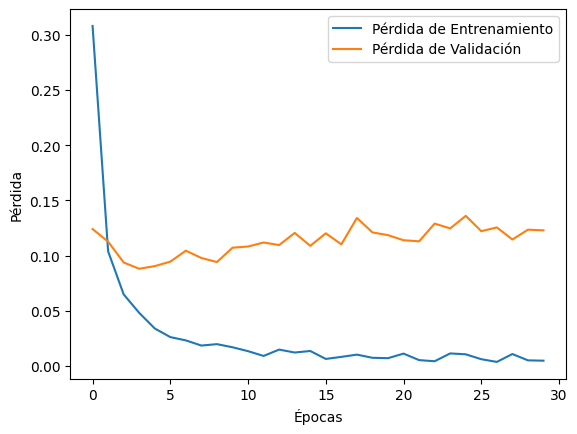

In [81]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción para la imagen personalizada: 4


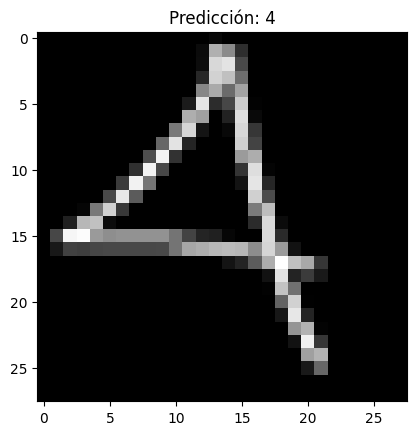

In [82]:
# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada('/home/santiago/Documentos/Estudio/MinTIC/Interligencia Artificial/Data/Imagenes/n4.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicción para la imagen personalizada: 0


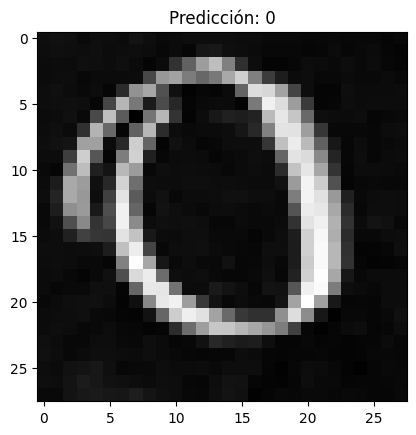

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicción para la imagen personalizada: 6


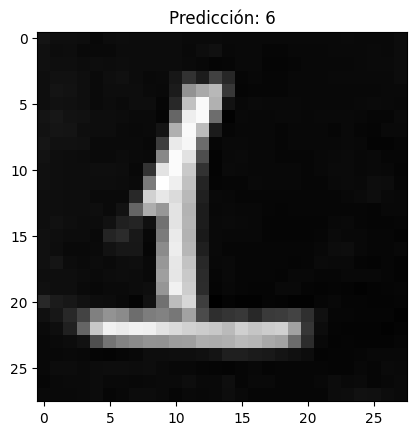

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicción para la imagen personalizada: 2


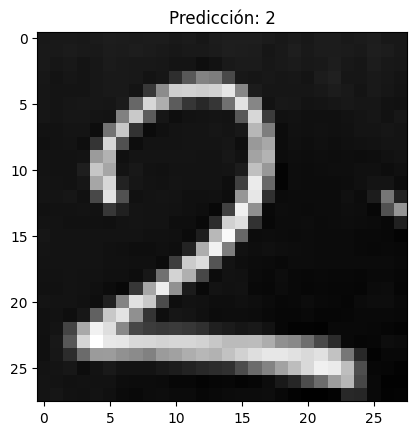

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción para la imagen personalizada: 2


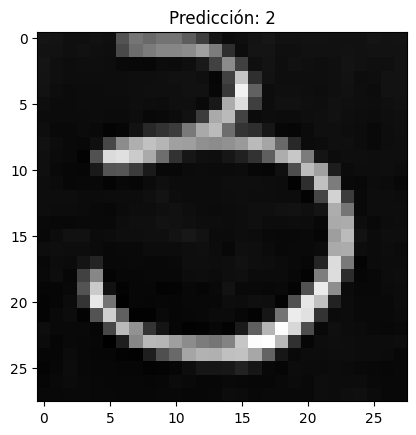

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicción para la imagen personalizada: 9


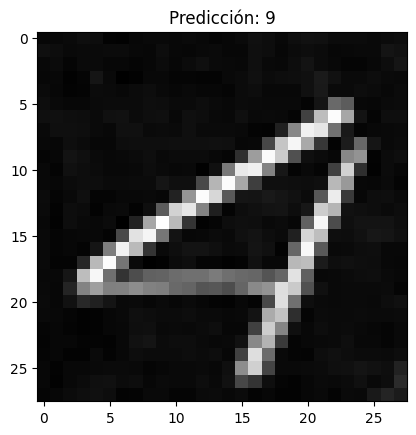

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción para la imagen personalizada: 3


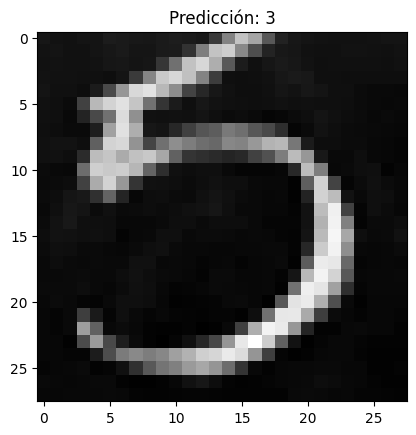

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicción para la imagen personalizada: 6


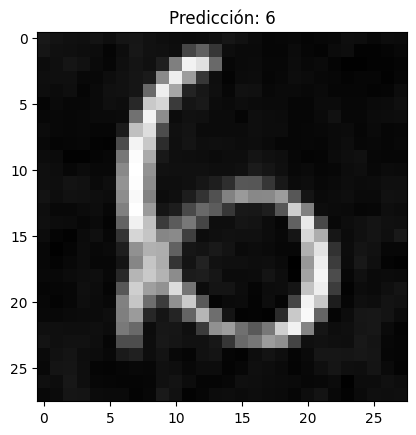

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicción para la imagen personalizada: 3


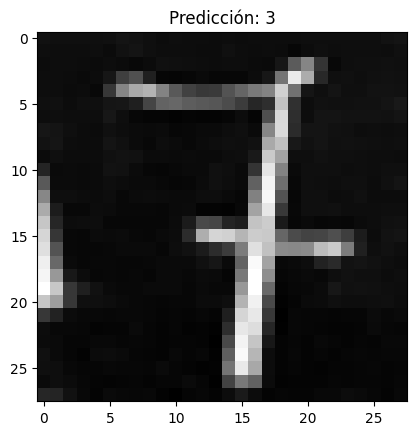

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicción para la imagen personalizada: 9


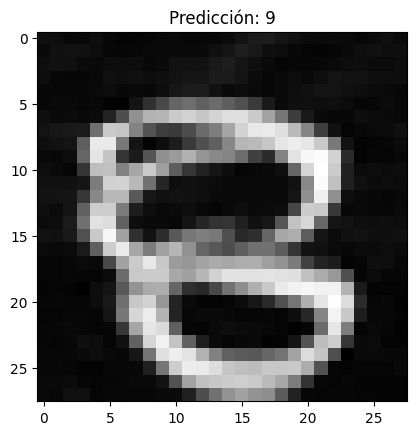

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicción para la imagen personalizada: 4


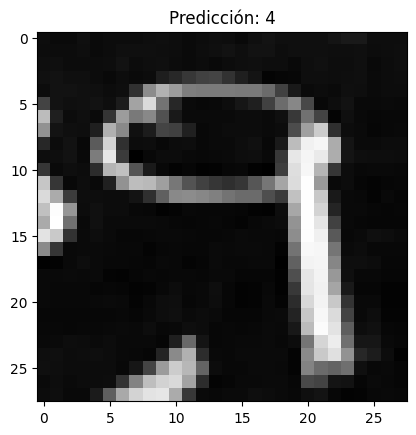

In [83]:
for i in range(10):
    predecir_imagen_personalizada('/home/santiago/Documentos/Estudio/MinTIC/Interligencia Artificial/Data/Imagenes/%s.png'%i)